Two toy examples here one using a swril example and also using amsler deformation grid.

Swirl Example

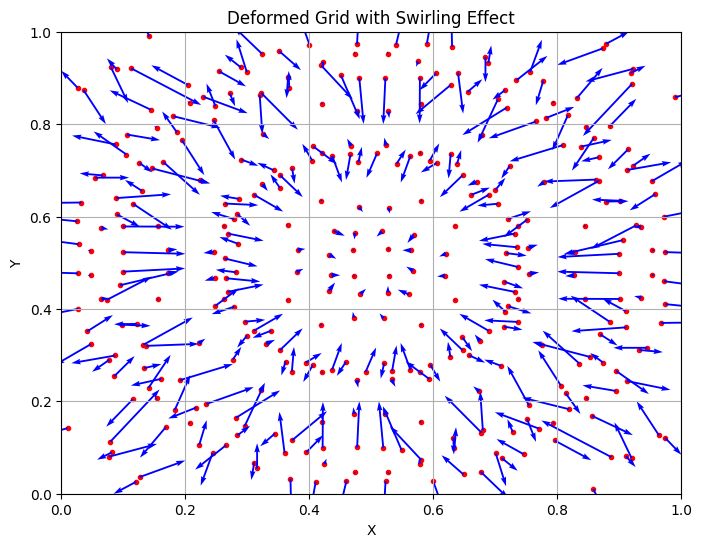

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid parameters
grid_size = 20
x = np.linspace(0, 1, grid_size)
y = np.linspace(0, 1, grid_size)
X, Y = np.meshgrid(x, y)

# Define deformation function (swirling effect)
def deformation_function(x, y):
    radius = np.sqrt((x - 0.5)**2 + (y - 0.5)**2)
    angle = np.arctan2(y - 0.5, x - 0.5)
    deformation_strength = 0.2  # Adjust this parameter to control the strength of the deformation
    deformation_radius = 0.4    # Adjust this parameter to control the size of the swirling effect
    x_deformed = x + deformation_strength * radius * np.cos(10 * np.pi * radius) * np.cos(angle + deformation_radius * np.sin(20 * np.pi * radius))
    y_deformed = y + deformation_strength * radius * np.cos(10 * np.pi * radius) * np.sin(angle + deformation_radius * np.sin(20 * np.pi * radius))
    return x_deformed, y_deformed

# Apply deformation function to the grid
X_deformed, Y_deformed = deformation_function(X, Y)

# Compute vector field (quiver plot)
U = X_deformed - X
V = Y_deformed - Y

# Plot the deformed grid
plt.figure(figsize=(8, 6))
plt.scatter(X_deformed, Y_deformed, color='r', marker='.')
plt.quiver(X_deformed, Y_deformed, U, V, color='b', angles='xy', scale_units='xy', scale=1)
plt.title('Deformed Grid with Swirling Effect')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

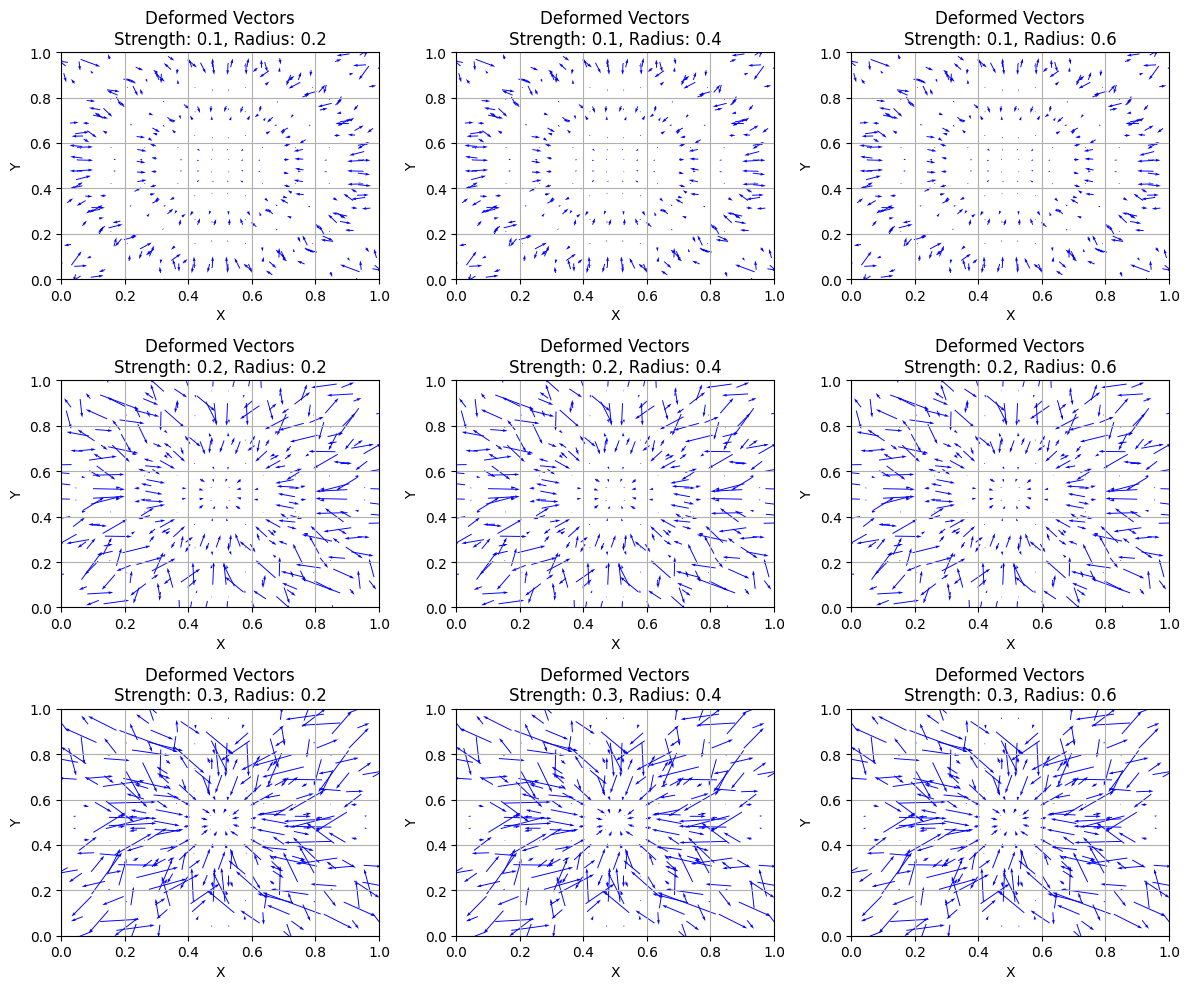

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid parameters
grid_size = 20
x = np.linspace(0, 1, grid_size)
y = np.linspace(0, 1, grid_size)
X, Y = np.meshgrid(x, y)

# Define range of deformation strengths and radii
deformation_strengths = [0.1, 0.2, 0.3]
deformation_radii = [0.2, 0.4, 0.6]

# Create a subplot grid
fig, axs = plt.subplots(len(deformation_strengths), len(deformation_radii), figsize=(12, 10))

# Loop through different deformation strengths and radii
for i, strength in enumerate(deformation_strengths):
    for j, radius in enumerate(deformation_radii):
        # Define deformation function
        def deformation_function(x, y):
            radius = np.sqrt((x - 0.5)**2 + (y - 0.5)**2)
            angle = np.arctan2(y - 0.5, x - 0.5)
            x_deformed = x + strength * radius * np.cos(10 * np.pi * radius) * np.cos(angle + radius * np.sin(20 * np.pi * radius))
            y_deformed = y + strength * radius * np.cos(10 * np.pi * radius) * np.sin(angle + radius * np.sin(20 * np.pi * radius))
            return x_deformed, y_deformed

        # Apply deformation function to the grid
        X_deformed, Y_deformed = deformation_function(X, Y)

        # Compute vector field (quiver plot)
        U = X_deformed - X
        V = Y_deformed - Y

        # Plot the deformed vectors
        axs[i, j].quiver(X_deformed, Y_deformed, U, V, color='b', angles='xy', scale_units='xy', scale=1)
        axs[i, j].set_title(f'Deformed Vectors\nStrength: {strength}, Radius: {radius}')
        axs[i, j].set_xlabel('X')
        axs[i, j].set_ylabel('Y')
        axs[i, j].set_xlim(0, 1)
        axs[i, j].set_ylim(0, 1)
        axs[i, j].grid(True)

# Adjust layout and show the montage
plt.tight_layout()
plt.show()


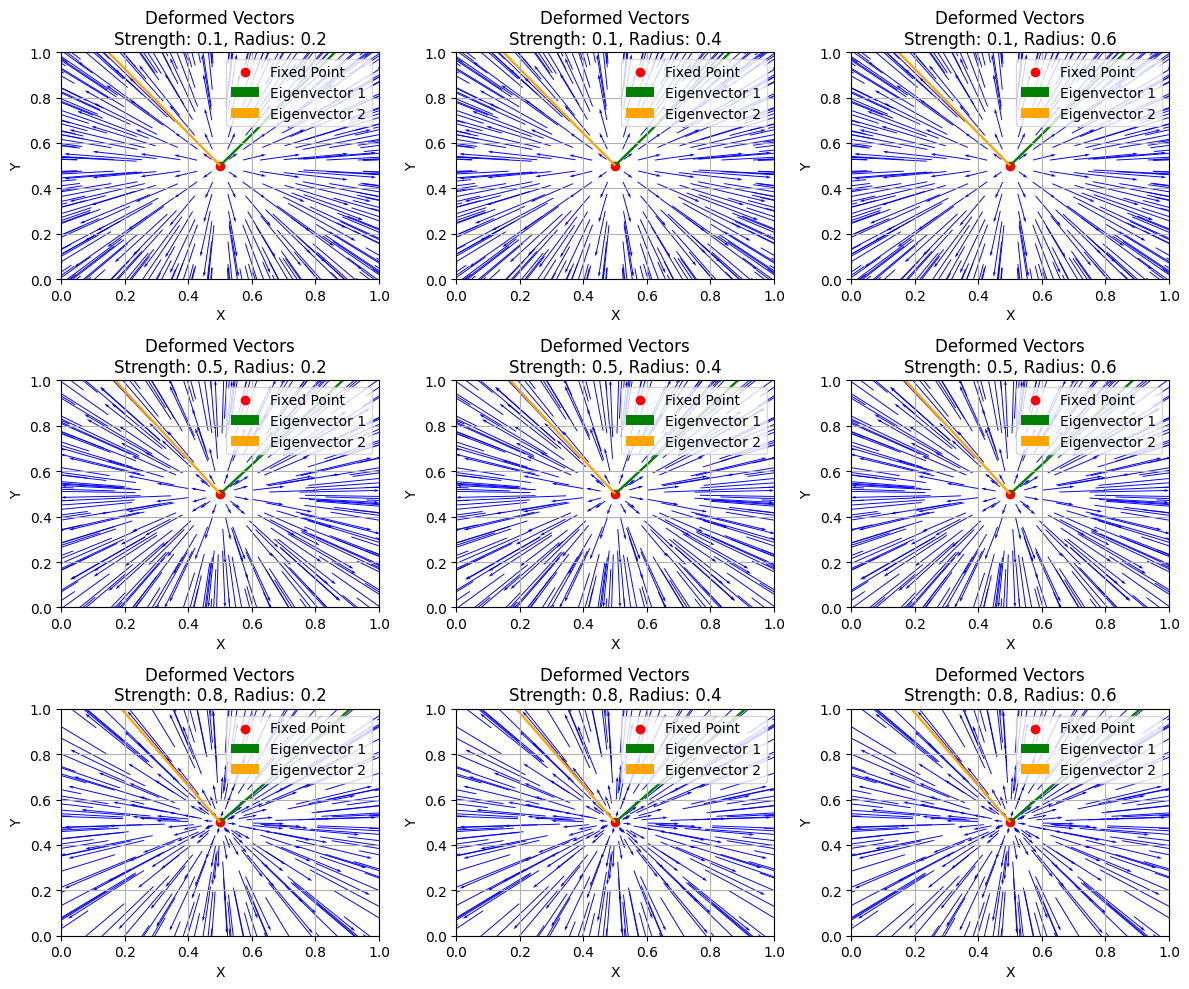

Eigenvectors for Strength=0.1, Radius=0.2:
Eigenvector 1: [0.71189685 0.70228404]
Eigenvector 2: [-0.70228404  0.71189685]

Eigenvectors for Strength=0.1, Radius=0.4:
Eigenvector 1: [0.71189685 0.70228404]
Eigenvector 2: [-0.70228404  0.71189685]

Eigenvectors for Strength=0.1, Radius=0.6:
Eigenvector 1: [0.71189685 0.70228404]
Eigenvector 2: [-0.70228404  0.71189685]

Eigenvectors for Strength=0.5, Radius=0.2:
Eigenvector 1: [0.73396833 0.67918369]
Eigenvector 2: [-0.67918369  0.73396833]

Eigenvectors for Strength=0.5, Radius=0.4:
Eigenvector 1: [0.73396833 0.67918369]
Eigenvector 2: [-0.67918369  0.73396833]

Eigenvectors for Strength=0.5, Radius=0.6:
Eigenvector 1: [0.73396833 0.67918369]
Eigenvector 2: [-0.67918369  0.73396833]

Eigenvectors for Strength=0.8, Radius=0.2:
Eigenvector 1: [0.75424252 0.65659593]
Eigenvector 2: [-0.65659593  0.75424252]

Eigenvectors for Strength=0.8, Radius=0.4:
Eigenvector 1: [0.75424252 0.65659593]
Eigenvector 2: [-0.65659593  0.75424252]

Eigenvec

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# Define grid parameters
grid_size = 20
x = np.linspace(0, 1, grid_size)
y = np.linspace(0, 1, grid_size)
X, Y = np.meshgrid(x, y)

# Define range of deformation strengths and radii
deformation_strengths = [0.1, 0.5, 0.8]
deformation_radii = [0.2, 0.4, 0.6]

# Fixed point for linearization
fixed_point = np.array([0.5, 0.5])

# Create an empty dictionary to store eigenvectors
eigenvectors_dict = {}

# Create a subplot grid
fig, axs = plt.subplots(len(deformation_strengths), len(deformation_radii), figsize=(12, 10))

# Loop through different deformation strengths and radii
for i, strength in enumerate(deformation_strengths):
    for j, radius in enumerate(deformation_radii):
        # Define deformation function
        def deformation_function(x, y):
            radius = np.sqrt((x - 0.5)**2 + (y - 0.5)**2)
            angle = np.arctan2(y - 0.5, x - 0.5)
            x_deformed = x + strength * radius * np.cos(10 * np.pi * radius) * np.cos(angle + radius * np.sin(20 * np.pi * radius))
            y_deformed = y + strength * radius * np.cos(10 * np.pi * radius) * np.sin(angle + radius * np.sin(20 * np.pi * radius))
            return x_deformed, y_deformed

        # Apply deformation function to the grid
        X_deformed, Y_deformed = deformation_function(X, Y)

        # Linearize around the fixed point
        dx = X_deformed - fixed_point[0]
        dy = Y_deformed - fixed_point[1]

        # Jacobian matrix
        J = np.array([[np.mean(np.gradient(dx, axis=0)), np.mean(np.gradient(dx, axis=1))],
                      [np.mean(np.gradient(dy, axis=0)), np.mean(np.gradient(dy, axis=1))]])

        # Find eigenvalues and eigenvectors
        eigenvalues, eigenvectors = eig(J)

        # Plot the deformed vectors
        axs[i, j].quiver(X_deformed, Y_deformed, dx, dy, color='b', angles='xy', scale_units='xy', scale=1)
        axs[i, j].scatter(*fixed_point, color='r', marker='o', label='Fixed Point')
        axs[i, j].quiver(*fixed_point, eigenvectors[0, 0], eigenvectors[1, 0], color='g', scale=0.2, label='Eigenvector 1')
        axs[i, j].quiver(*fixed_point, eigenvectors[0, 1], eigenvectors[1, 1], color='orange', scale=0.2, label='Eigenvector 2')
        axs[i, j].set_title(f'Deformed Vectors\nStrength: {strength}, Radius: {radius}')
        axs[i, j].set_xlabel('X')
        axs[i, j].set_ylabel('Y')
        axs[i, j].set_xlim(0, 1)
        axs[i, j].set_ylim(0, 1)
        axs[i, j].grid(True)
        axs[i, j].legend()

        # Store eigenvectors in the dictionary
        eigenvectors_dict[(strength, radius)] = eigenvectors

# Adjust layout and show the montage
plt.tight_layout()
plt.show()

# Print the stored eigenvectors
for key, value in eigenvectors_dict.items():
    print(f'Eigenvectors for Strength={key[0]}, Radius={key[1]}:')
    print(f'Eigenvector 1: {value[:, 0]}')
    print(f'Eigenvector 2: {value[:, 1]}\n')


Text(0.5, 1.0, 'Quantitative monitoring over time for a patient')

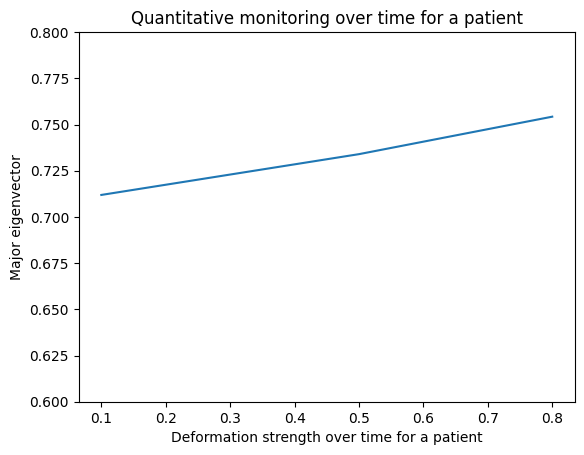

In [34]:
strength=[0.1, 0.5, 0.8]
radius=0.4
e=[]
for i in strength:
    e.append(eigenvectors_dict[(i, radius)][0][0])
plt.plot(strength,e)
plt.ylim([0.6,0.8])
plt.xlabel("Deformation strength over time for a patient")
plt.ylabel("Major eigenvector")
plt.title("Quantitative monitoring over time for a patient")

Amsler grid example

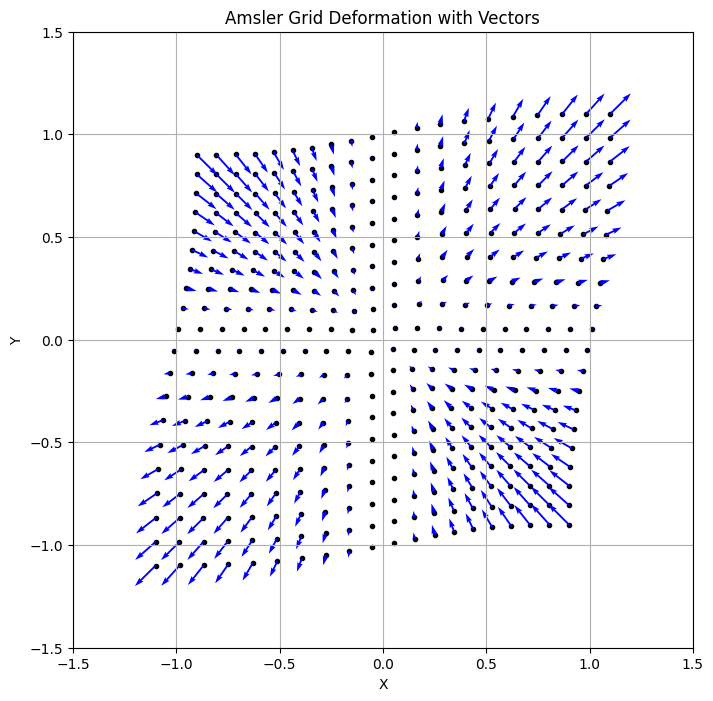

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid parameters
grid_size = 20
x = np.linspace(-1, 1, grid_size)
y = np.linspace(-1, 1, grid_size)
X, Y = np.meshgrid(x, y)

# Define Amsler grid deformation function
def amsler_deformation(x, y, frequency=2, amplitude=0.1):
    radius = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    deformed_radius = radius * (1 + amplitude * np.sin(frequency * theta))
    x_deformed = deformed_radius * np.cos(theta)
    y_deformed = deformed_radius * np.sin(theta)
    return x_deformed, y_deformed

# Apply Amsler grid deformation to the grid
X_deformed, Y_deformed = amsler_deformation(X, Y)

# Compute vector field (quiver plot)
U = X_deformed - X
V = Y_deformed - Y

# Plot the Amsler grid with vectors
plt.figure(figsize=(8, 8))
plt.scatter(X_deformed, Y_deformed, color='k', marker='.')
plt.quiver(X_deformed, Y_deformed, U, V, color='b', angles='xy', scale_units='xy', scale=1)
plt.title('Amsler Grid Deformation with Vectors')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.show()


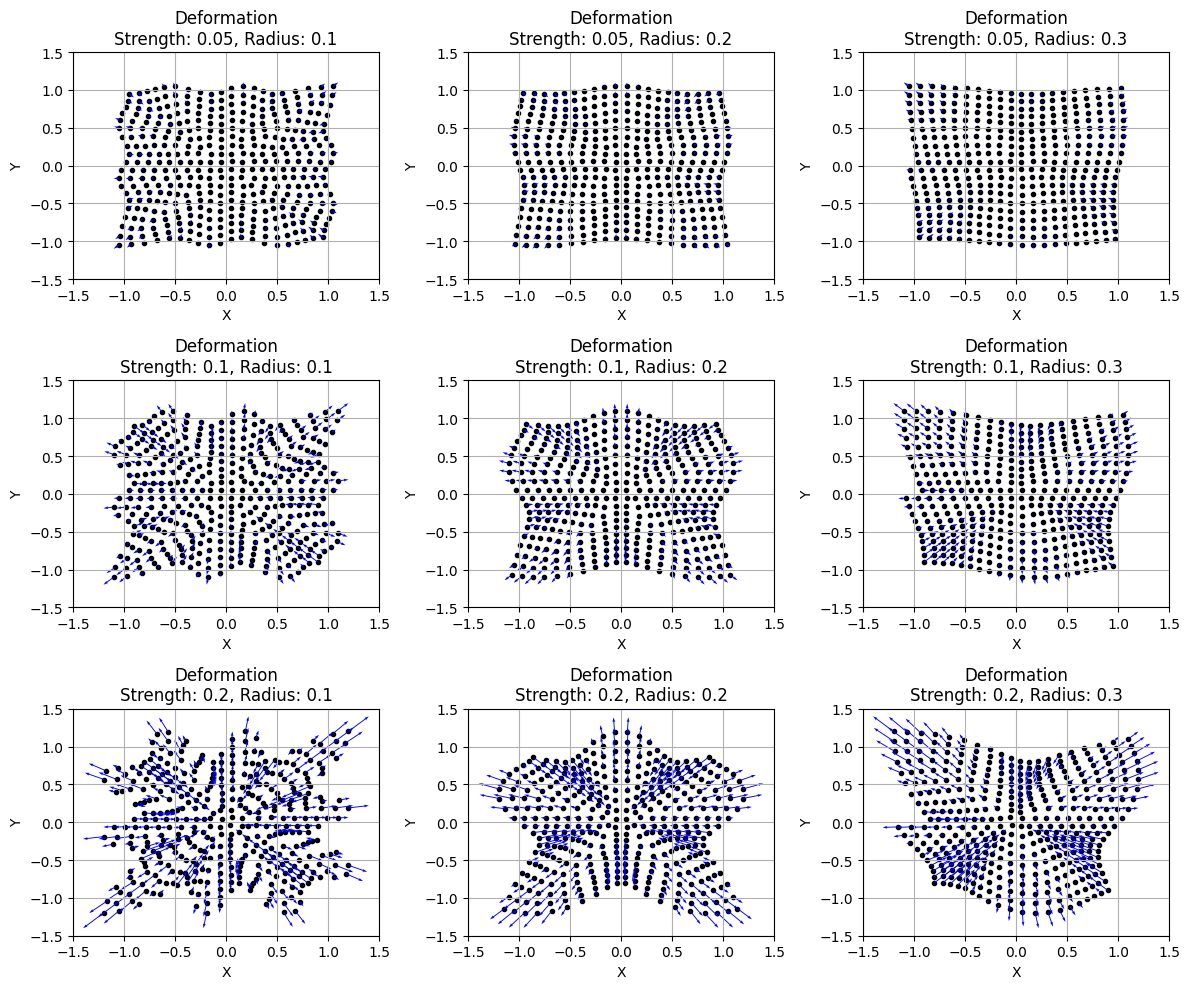

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid parameters
grid_size = 20
x = np.linspace(-1, 1, grid_size)
y = np.linspace(-1, 1, grid_size)
X, Y = np.meshgrid(x, y)

# Define Amsler grid deformation function
def amsler_deformation(x, y, frequency=2, amplitude=0.1):
    radius = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    deformed_radius = radius * (1 + amplitude * np.sin(frequency * theta))
    x_deformed = deformed_radius * np.cos(theta)
    y_deformed = deformed_radius * np.sin(theta)
    return x_deformed, y_deformed

# Create a subplot grid
strengths = [0.05, 0.1, 0.2]
radii = [0.1, 0.2, 0.3]

fig, axs = plt.subplots(len(strengths), len(radii), figsize=(12, 10))

# Loop through different deformation strengths and radii
for i, strength in enumerate(strengths):
    for j, radius in enumerate(radii):
        # Apply Amsler grid deformation to the grid
        X_deformed, Y_deformed = amsler_deformation(X, Y, amplitude=strength, frequency=1/radius)

        # Compute vector field (quiver plot)
        U = X_deformed - X
        V = Y_deformed - Y

        # Plot the Amsler grid with vectors
        axs[i, j].scatter(X_deformed, Y_deformed, color='k', marker='.')
        axs[i, j].quiver(X_deformed, Y_deformed, U, V, color='b', angles='xy', scale_units='xy', scale=1)
        axs[i, j].set_title(f'Deformation\nStrength: {strength}, Radius: {radius}')
        axs[i, j].set_xlabel('X')
        axs[i, j].set_ylabel('Y')
        axs[i, j].set_xlim(-1.5, 1.5)
        axs[i, j].set_ylim(-1.5, 1.5)
        axs[i, j].grid(True)

# Adjust layout and show the montage
plt.tight_layout()
plt.show()


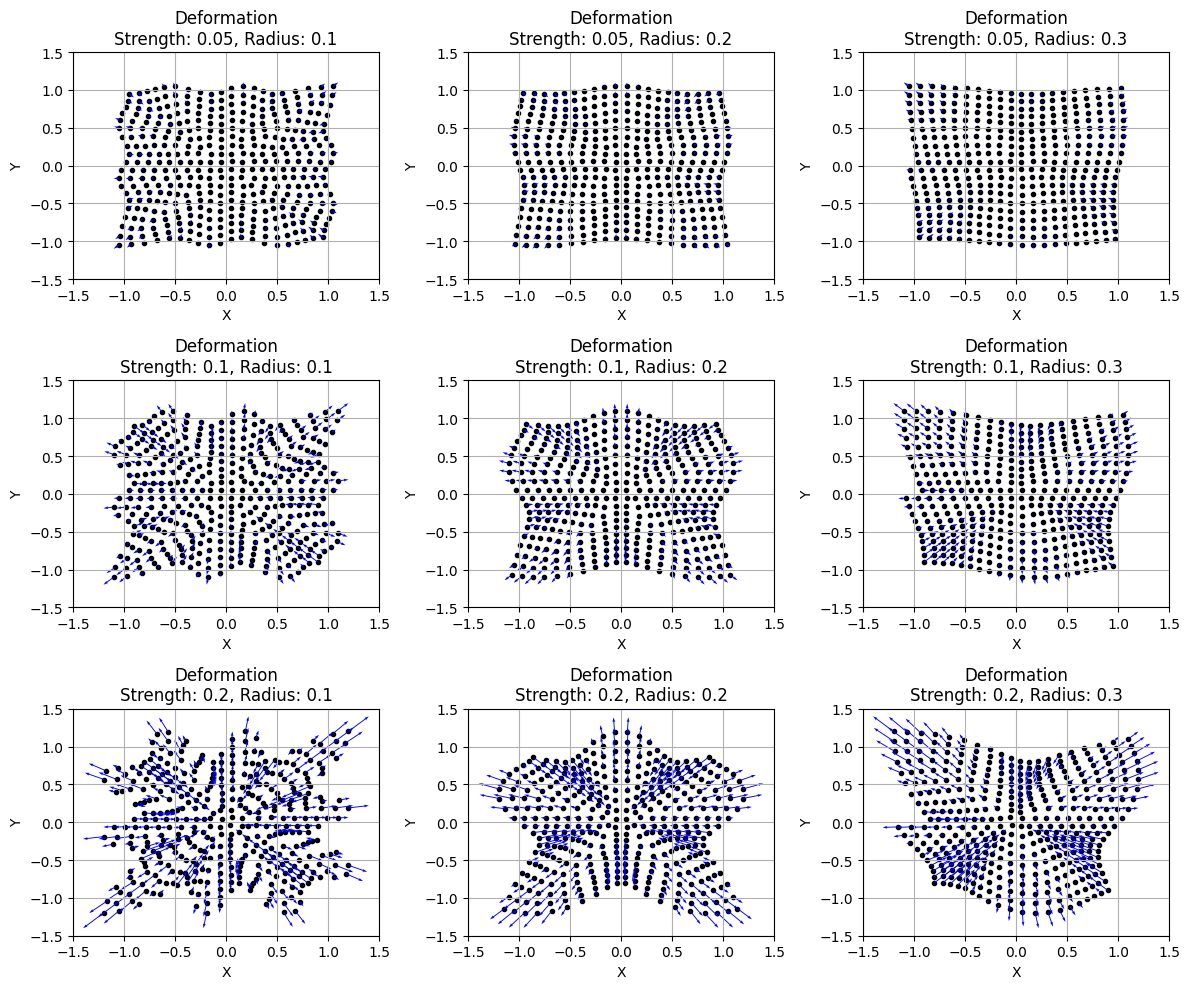

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid parameters
grid_size = 20
x = np.linspace(-1, 1, grid_size)
y = np.linspace(-1, 1, grid_size)
X, Y = np.meshgrid(x, y)

# Define Amsler grid deformation function
def amsler_deformation(x, y, frequency=2, amplitude=0.1):
    radius = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    deformed_radius = radius * (1 + amplitude * np.sin(frequency * theta))
    x_deformed = deformed_radius * np.cos(theta)
    y_deformed = deformed_radius * np.sin(theta)
    return x_deformed, y_deformed

# Create a subplot grid
strengths = [0.05, 0.1, 0.2]
radii = [0.1, 0.2, 0.3]

fig, axs = plt.subplots(len(strengths), len(radii), figsize=(12, 10))

# Loop through different deformation strengths and radii
for i, strength in enumerate(strengths):
    for j, radius in enumerate(radii):
        # Apply Amsler grid deformation to the grid
        X_deformed, Y_deformed = amsler_deformation(X, Y, amplitude=strength, frequency=1/radius)

        # Compute vector field (quiver plot)
        U = X_deformed - X
        V = Y_deformed - Y

        # Plot the Amsler grid with vectors
        axs[i, j].scatter(X_deformed, Y_deformed, color='k', marker='.')
        axs[i, j].quiver(X_deformed, Y_deformed, U, V, color='b', angles='xy', scale_units='xy', scale=1)
        axs[i, j].set_title(f'Deformation\nStrength: {strength}, Radius: {radius}')
        axs[i, j].set_xlabel('X')
        axs[i, j].set_ylabel('Y')
        axs[i, j].set_xlim(-1.5, 1.5)
        axs[i, j].set_ylim(-1.5, 1.5)
        axs[i, j].grid(True)

# Adjust layout and show the montage
plt.tight_layout()
plt.show()


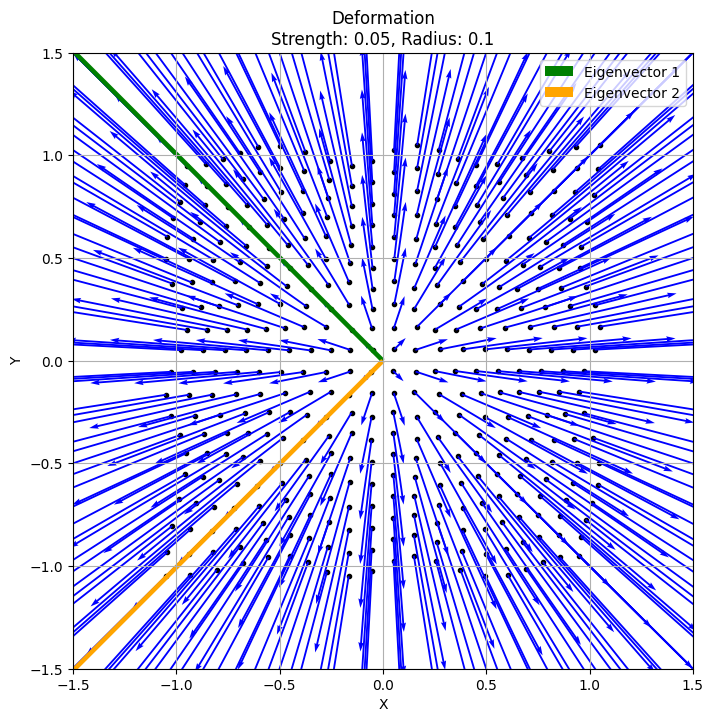

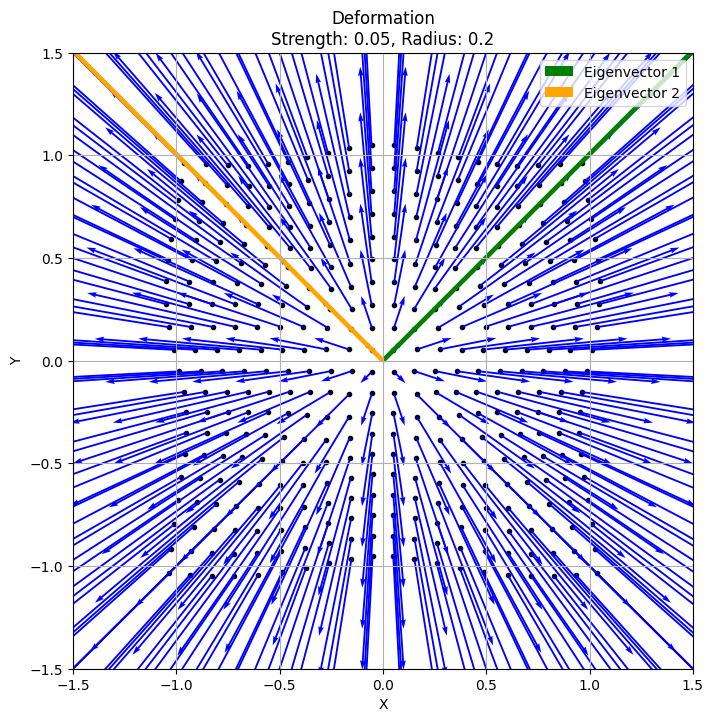

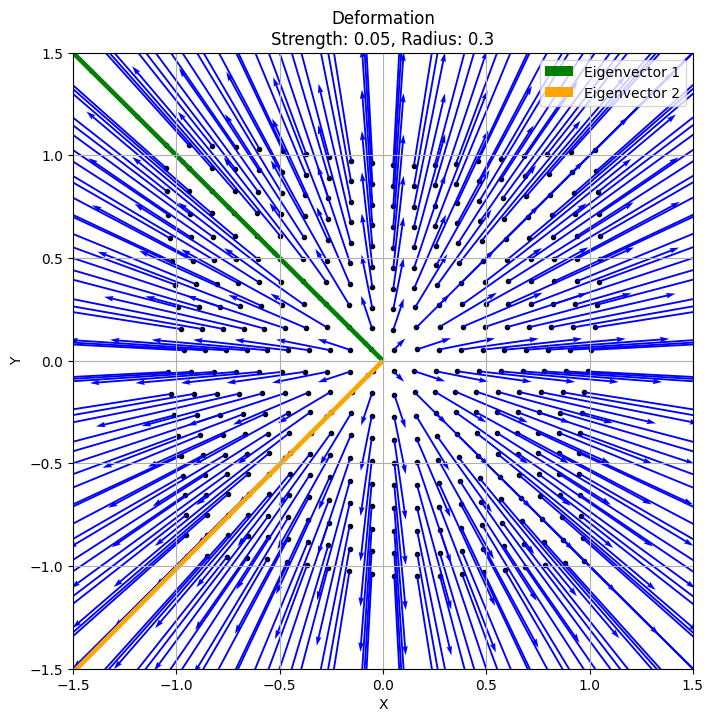

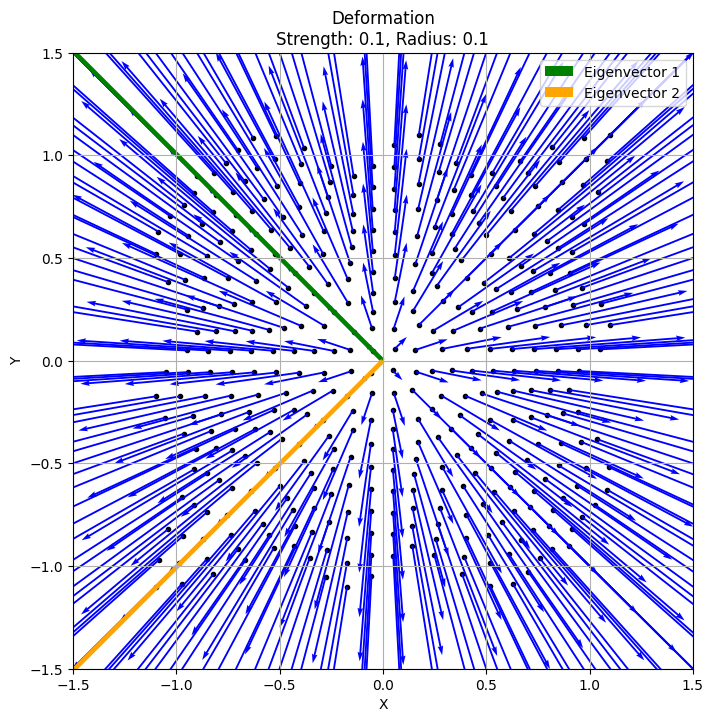

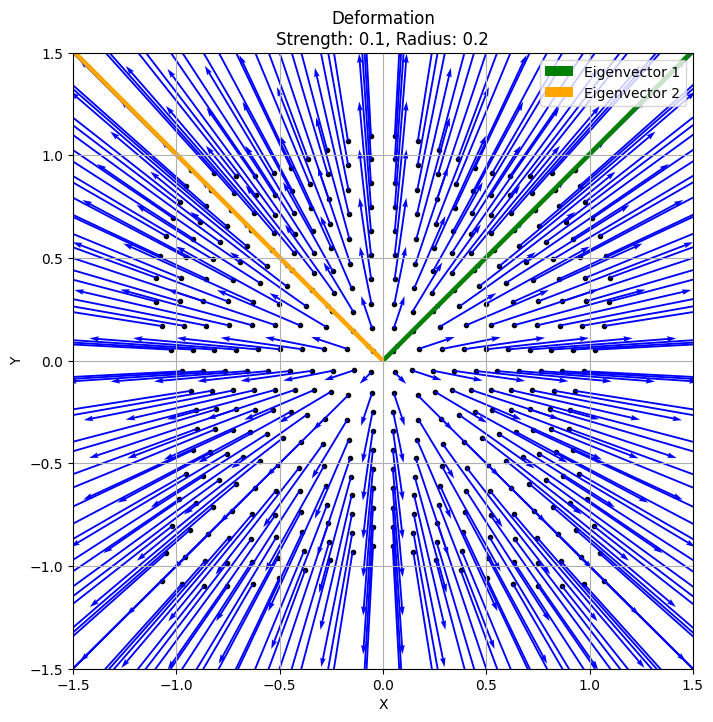

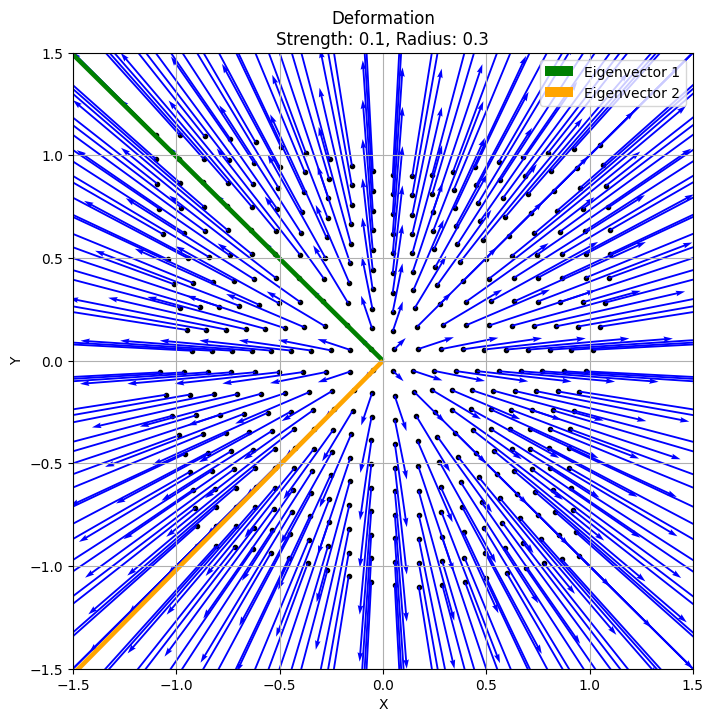

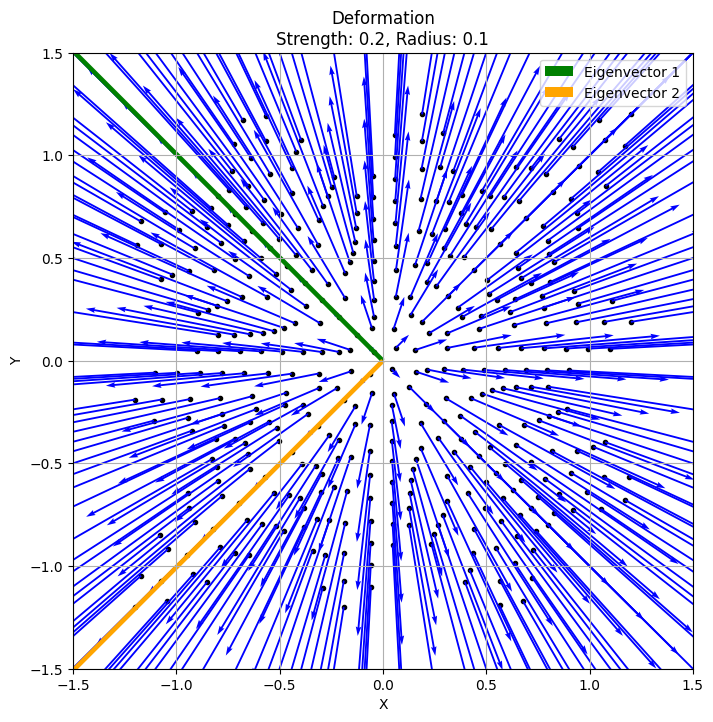

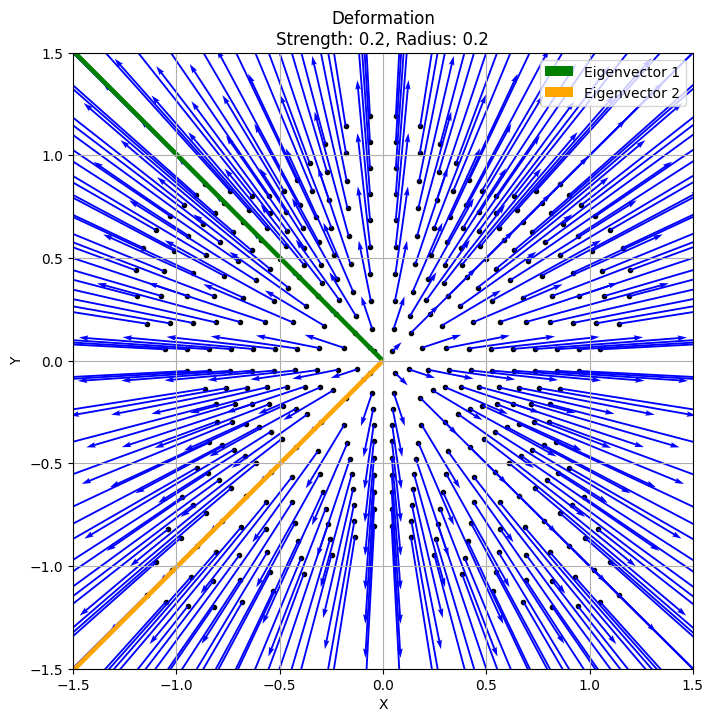

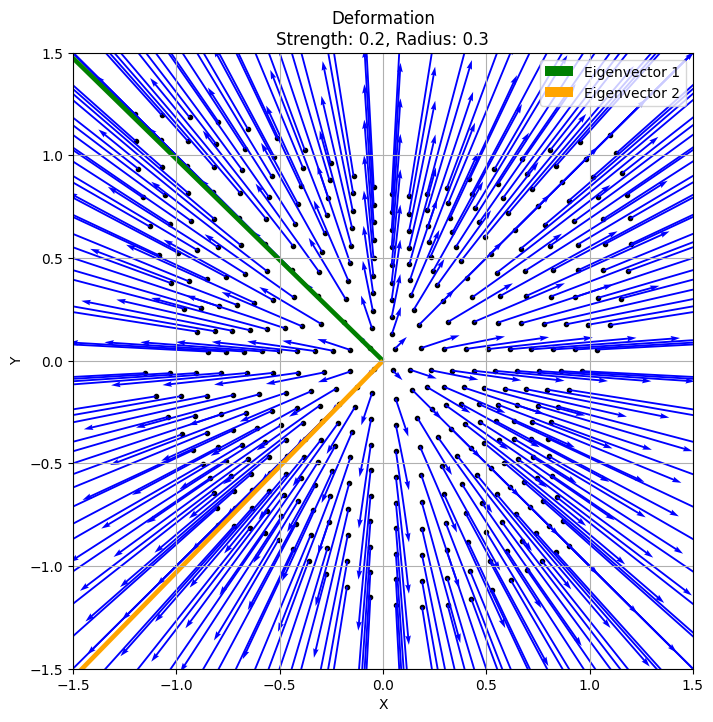

Eigenvectors for Strength=0.05, Radius=0.1:
Eigenvector 1: [-0.70710678  0.70710678]
Eigenvector 2: [-0.70710678 -0.70710678]

Eigenvectors for Strength=0.05, Radius=0.2:
Eigenvector 1: [0.70710678 0.70710678]
Eigenvector 2: [-0.70710678  0.70710678]

Eigenvectors for Strength=0.05, Radius=0.3:
Eigenvector 1: [-0.70919366  0.70501373]
Eigenvector 2: [-0.70501373 -0.70919366]

Eigenvectors for Strength=0.1, Radius=0.1:
Eigenvector 1: [-0.70710678  0.70710678]
Eigenvector 2: [-0.70710678 -0.70710678]

Eigenvectors for Strength=0.1, Radius=0.2:
Eigenvector 1: [0.70710678 0.70710678]
Eigenvector 2: [-0.70710678  0.70710678]

Eigenvectors for Strength=0.1, Radius=0.3:
Eigenvector 1: [-0.7112742   0.70291466]
Eigenvector 2: [-0.70291466 -0.7112742 ]

Eigenvectors for Strength=0.2, Radius=0.1:
Eigenvector 1: [-0.70710678  0.70710678]
Eigenvector 2: [-0.70710678 -0.70710678]

Eigenvectors for Strength=0.2, Radius=0.2:
Eigenvector 1: [-0.70710678  0.70710678]
Eigenvector 2: [-0.70710678 -0.7071

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# Define grid parameters
grid_size = 20
x = np.linspace(-1, 1, grid_size)
y = np.linspace(-1, 1, grid_size)
X, Y = np.meshgrid(x, y)

# Define Amsler grid deformation function
def amsler_deformation(x, y, frequency=2, amplitude=0.1):
    radius = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    deformed_radius = radius * (1 + amplitude * np.sin(frequency * theta))
    x_deformed = deformed_radius * np.cos(theta)
    y_deformed = deformed_radius * np.sin(theta)
    return x_deformed, y_deformed

# Fixed point for linearization
fixed_point = np.array([0.0, 0.0])

# Create a subplot grid
strengths = [0.05, 0.1, 0.2]
radii = [0.1, 0.2, 0.3]

# Dictionary to store eigenvectors
eigenvectors_dict = {}

# Loop through different deformation strengths and radii
for strength in strengths:
    for radius in radii:
        # Apply Amsler grid deformation to the grid
        X_deformed, Y_deformed = amsler_deformation(X, Y, amplitude=strength, frequency=1/radius)

        # Linearize around the fixed point
        dx = X_deformed - fixed_point[0]
        dy = Y_deformed - fixed_point[1]

        # Jacobian matrix
        J = np.array([[np.mean(np.gradient(dx, axis=0)), np.mean(np.gradient(dx, axis=1))],
                      [np.mean(np.gradient(dy, axis=0)), np.mean(np.gradient(dy, axis=1))]])

        # Find eigenvalues and eigenvectors
        eigenvalues, eigenvectors = eig(J)

        # Save eigenvectors to the dictionary
        eigenvectors_dict[(strength, radius)] = eigenvectors

        # Plot the Amsler grid with vectors and eigenvectors
        plt.figure(figsize=(8, 8))
        plt.scatter(X_deformed, Y_deformed, color='k', marker='.')
        plt.quiver(X_deformed, Y_deformed, dx, dy, color='b', angles='xy', scale_units='xy', scale=1)

        # Plot eigenvectors as continuous lines
        for i in range(len(fixed_point)):
            plt.plot([fixed_point[0], fixed_point[0] + eigenvectors[i, 0]],
                     [fixed_point[1], fixed_point[1] + eigenvectors[i, 1]],
                     color='g' if i == 0 else 'orange', linewidth=2)

        plt.title(f'Deformation\nStrength: {strength}, Radius: {radius}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.xlim(-1.5, 1.5)
        plt.ylim(-1.5, 1.5)
        plt.grid(True)
        plt.show()

# Print the stored eigenvectors
for key, value in eigenvectors_dict.items():
    print(f'Eigenvectors for Strength={key[0]}, Radius={key[1]}:')
    print(f'Eigenvector 1: {value[:, 0]}')
    print(f'Eigenvector 2: {value[:, 1]}\n')


Text(0.5, 1.0, 'Quantitative monitoring over time for a patient')

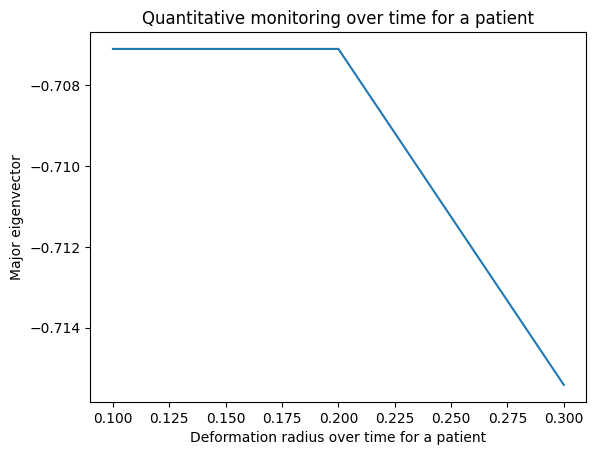

In [50]:
strength=0.2
radius=[0.1,0.2,0.3]
e=[]
for i in radius:
    e.append(eigenvectors_dict[(strength, i)][0][0])
plt.plot(radius,e)
plt.xlabel("Deformation radius over time for a patient")
plt.ylabel("Major eigenvector")
plt.title("Quantitative monitoring over time for a patient")